# Leer el Dataset who.csv

In [44]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [45]:
filepath = '../Datasets_Proyecto1/who.csv'
who_data = pd.read_csv(filepath)
who_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Explorar los datos para obtener ideas.

In [46]:
who_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [47]:
who_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Graficando métricas de la tabla para un mejor análisis

In [48]:
who_data["hypertension"].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

<AxesSubplot:>

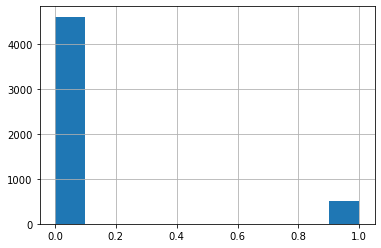

In [49]:
who_data["hypertension"].hist()

In [50]:
who_data["heart_disease"].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

<AxesSubplot:>

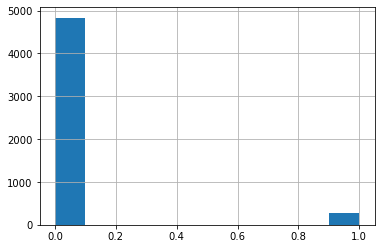

In [51]:
who_data["heart_disease"].hist()

In [52]:
who_data["avg_glucose_level"].value_counts()

93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64

<AxesSubplot:>

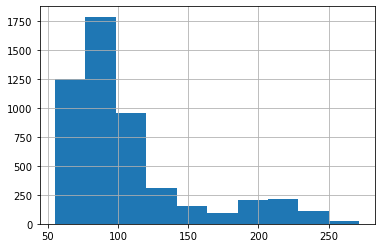

In [53]:
who_data["avg_glucose_level"].hist()

In [54]:
who_data["avg_glucose_level_cat"] = pd.cut(who_data["avg_glucose_level"],
                               bins=[50, 100, 150, 200, 250, 300, np.inf],
                               labels=[50, 100, 150, 200, 250, 300])
who_data["avg_glucose_level_cat"].value_counts()

50     3131
100    1249
200     409
150     296
250      25
300       0
Name: avg_glucose_level_cat, dtype: int64

<AxesSubplot:>

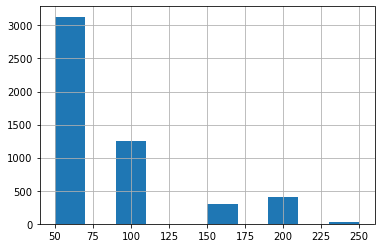

In [55]:
who_data["avg_glucose_level_cat"].hist()

# Preparar los datos para exponer mejor los patrones de datos subyacentes a los algoritmos de aprendizaje automático.

In [56]:
y = who_data["stroke"]
X = who_data.drop("stroke", axis=1)
X

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,avg_glucose_level_cat
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,200
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,200
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,100
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,150
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,150
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,50
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,100
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,50
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,150


# Generar el conjunto de prueba.

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,avg_glucose_level_cat
978,37349,Female,61.0,0,0,Yes,Private,Rural,123.36,33.4,never smoked,100
550,68241,Female,15.0,0,0,No,children,Urban,126.96,28.7,Unknown,100
1684,12436,Male,6.0,0,0,No,children,Urban,97.46,21.3,Unknown,50
2164,63938,Female,49.0,0,0,Yes,Self-employed,Urban,149.13,42.9,smokes,100
4168,8122,Female,37.0,0,0,Yes,Private,Urban,94.12,34.2,Unknown,50
...,...,...,...,...,...,...,...,...,...,...,...,...
3088,26267,Female,76.0,0,0,Yes,Self-employed,Urban,267.61,27.9,smokes,250
5068,49598,Male,80.0,0,0,Yes,Self-employed,Urban,120.03,24.3,formerly smoked,100
1135,71440,Female,26.0,0,0,Yes,Private,Urban,90.66,27.2,Unknown,50
4496,72184,Female,43.0,0,0,Yes,Self-employed,Urban,89.73,23.5,formerly smoked,50


<AxesSubplot:>

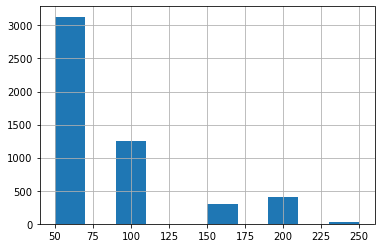

In [58]:
who_data["avg_glucose_level_cat"].hist()

<AxesSubplot:>

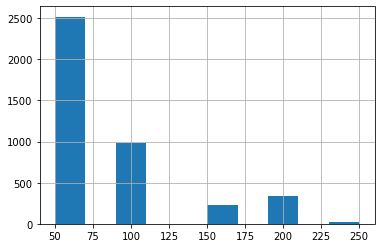

In [59]:
X_train["avg_glucose_level_cat"].hist()

In [60]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(who_data, who_data["avg_glucose_level_cat"]):
    strat_train_set = who_data.loc[train_index]
    strat_test_set = who_data.loc[test_index]

In [61]:
strat_test_set["avg_glucose_level_cat"].value_counts() / len(strat_test_set)

50     0.612524
100    0.244618
200    0.080235
150    0.057730
250    0.004892
300    0.000000
Name: avg_glucose_level_cat, dtype: float64

In [62]:
who_data["avg_glucose_level_cat"].value_counts() / len(who_data)

50     0.612720
100    0.244423
200    0.080039
150    0.057926
250    0.004892
300    0.000000
Name: avg_glucose_level_cat, dtype: float64

In [63]:
def avg_glucose_level_proportions(data):
    return data["avg_glucose_level_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(who_data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": avg_glucose_level_proportions(who_data),
    "Stratified": avg_glucose_level_proportions(strat_test_set),
    "Random": avg_glucose_level_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
50,0.612720,0.612524,0.628180,2.523156,-0.031939
100,0.244423,0.244618,0.239726,-1.921537,0.080064
150,0.057926,0.057730,0.051859,-10.472973,-0.337838
200,0.080039,0.080235,0.074364,-7.090465,0.244499
250,0.004892,0.004892,0.005871,20.000000,0.000000
300,0.000000,0.000000,0.000000,NaN,NaN


In [41]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("avg_glucose_level_cat", axis=1, inplace=True)

# Visualización de los datos

In [64]:
who_data = strat_train_set.copy()

# Histogramas

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

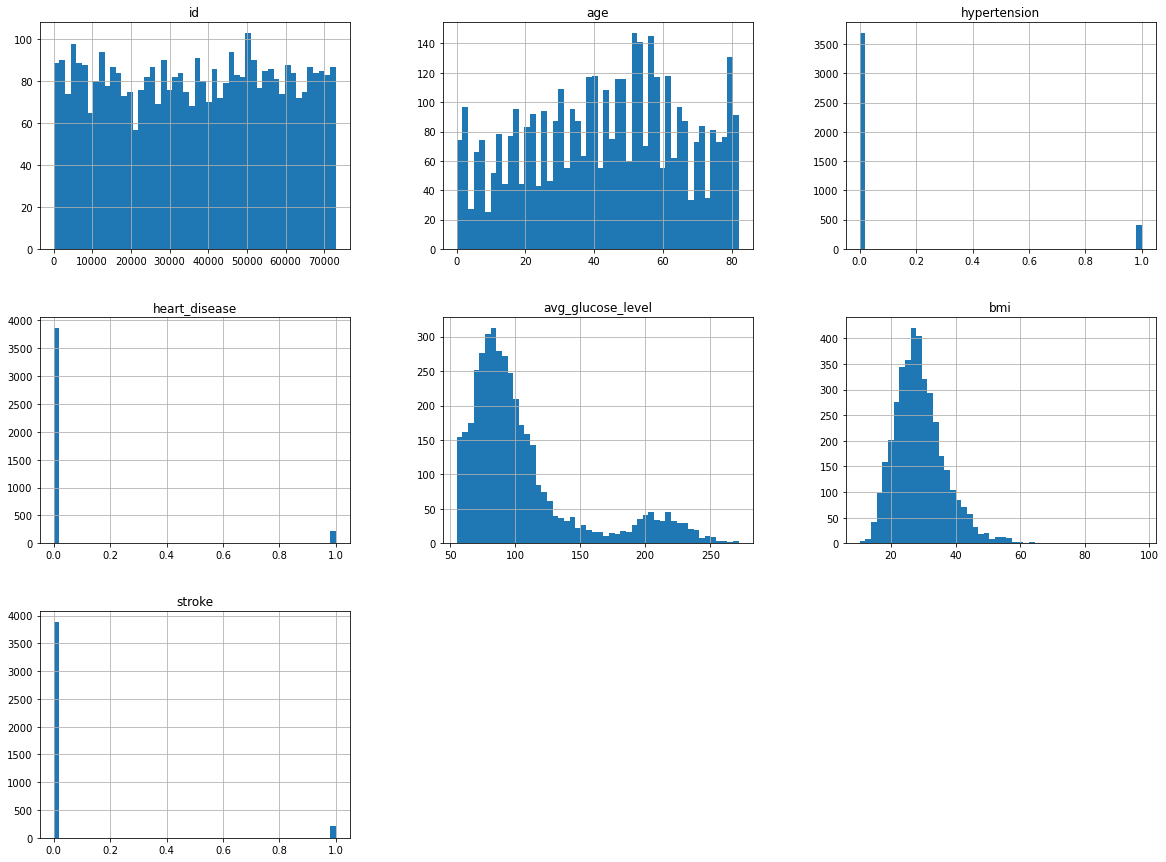

In [65]:
who_data.hist(bins=50, figsize=(20,15))

<AxesSubplot:>

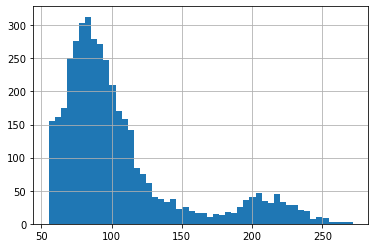

In [66]:
who_data["avg_glucose_level"].hist(bins=50)

### Matriz de correlación

In [67]:
corr_matrix = who_data.corr()
corr_matrix["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.243701
heart_disease        0.141163
hypertension         0.128377
avg_glucose_level    0.124858
bmi                  0.038978
id                  -0.002881
Name: stroke, dtype: float64

array([[<AxesSubplot:xlabel='stroke', ylabel='stroke'>,
        <AxesSubplot:xlabel='age', ylabel='stroke'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='stroke'>,
        <AxesSubplot:xlabel='hypertension', ylabel='stroke'>],
       [<AxesSubplot:xlabel='stroke', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='age'>,
        <AxesSubplot:xlabel='hypertension', ylabel='age'>],
       [<AxesSubplot:xlabel='stroke', ylabel='heart_disease'>,
        <AxesSubplot:xlabel='age', ylabel='heart_disease'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='heart_disease'>,
        <AxesSubplot:xlabel='hypertension', ylabel='heart_disease'>],
       [<AxesSubplot:xlabel='stroke', ylabel='hypertension'>,
        <AxesSubplot:xlabel='age', ylabel='hypertension'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='hypertension'>,
        <AxesSubplot:xlabel='hypertension', ylabel='hypertension'>]],
      dtype=object)

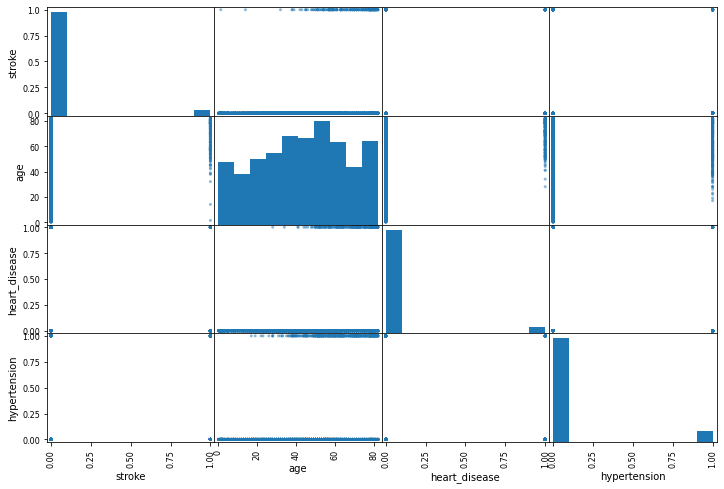

In [68]:
from pandas.plotting import scatter_matrix

attributes = ["stroke", "age", "heart_disease", "hypertension"]
scatter_matrix(who_data[attributes], figsize=(12, 8))